In [90]:
import requests
import pandas as pd

base_url = "https://data.enseignementsup-recherche.gouv.fr/api/records/1.0/search/"
params = {
    "dataset": "fr-esr-principaux-diplomes-et-formations-prepares-etablissements-publics",
    "select": "annee_universitaire,etablissement_lib,diplome_lib,effectif",
    "where": "annee_universitaire IN ('2020-21', '2021-22', '2022-23')",
    "order_by": "annee_universitaire DESC",
    "rows": 1000  # Nombre maximum de résultats par requête
}

def get_all_data(params):
    all_records = []
    params['start'] = 0
    
    while True:
        response = requests.get(base_url, params=params)
        data = response.json()
        
        if 'records' not in data:
            print("Fin des résultats ou erreur:", data)
            break
        
        records = [record['fields'] for record in data['records']]
        all_records.extend(records)
        
        if len(records) < params['rows']:
            break
        
        params['start'] += params['rows']
        
        if params['start'] >= 10000:
            print("Limite de 10000 enregistrements atteinte pour cette requête.")
            break
    
    return all_records

# Récupérer les données pour chaque année
all_data = []
for year in ['2020-21', '2021-22', '2022-23']:
    params['where'] = f"annee_universitaire='{year}'"
    year_data = get_all_data(params)
    all_data.extend(year_data)
    print(f"Données récupérées pour l'année {year}: {len(year_data)} enregistrements")

# Créer un DataFrame avec toutes les données
df = pd.DataFrame(all_data)





Limite de 10000 enregistrements atteinte pour cette requête.
Données récupérées pour l'année 2020-21: 10000 enregistrements
Limite de 10000 enregistrements atteinte pour cette requête.
Données récupérées pour l'année 2021-22: 10000 enregistrements
Limite de 10000 enregistrements atteinte pour cette requête.
Données récupérées pour l'année 2022-23: 10000 enregistrements


In [25]:
# Afficher les premières lignes et quelques statistiques
print(df.head())
print(df.info())
print(df['annee_universitaire'].value_counts())

                                   etablissement_lib etablissement_id_uai  \
0                          Université Henri Poincaré             0541507V   
1  Université Montpellier 2 - Sciences techniques...             0341088Y   
2                          Université Paris Nanterre             0921204J   
3                 Université Claude Bernard - Lyon 1             0691774D   
4            Université Toulouse III - Paul Sabatier             0311384L   

  implantation_code_commune  niveau_lib  hommes   diplome  \
0                     54138  1ère année    21.0  LIC_PRO1   
1                     34172  1ère année     5.0  LIC_PRO1   
2                     92077  1ère année    12.0  LIC_PRO1   
3                     69266  1ère année    28.0  LIC_PRO1   
4                     65440  1ère année    50.0  LIC_PRO1   

  etablissement_id_paysage_actuel annee                      diplome_lib  \
0                           t6Cq5  2008  Licence professionnelle en 1 an   
1                 

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Statistiques des effectifs :
count    30000.000000
mean        53.849700
std        119.689425
min          0.000000
25%         16.000000
50%         25.000000
75%         49.250000
max       4892.000000
Name: effectif, dtype: float64


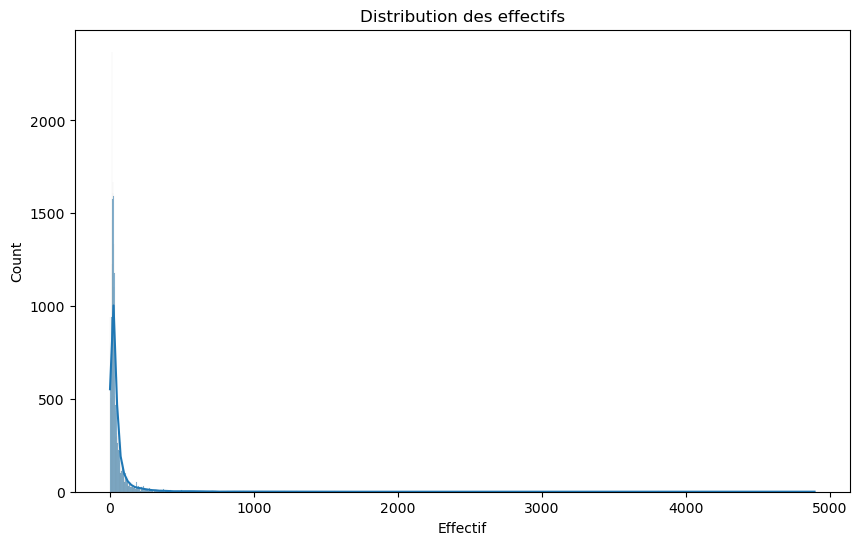

In [49]:
# Analyse de la distribution des effectifs 
print("Statistiques des effectifs :")
print(df['effectif'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(df['effectif'], kde=True)
plt.title("Distribution des effectifs")
plt.xlabel("Effectif")
plt.show()

In [71]:
#  Statistiques par niveau d'étude (pour comparer master et doctorat)
stats_par_niveau = df.groupby('cursus_lmd').agg({
    'effectif': ['mean', 'median', 'std'],
    'ratio_femmes': ['mean', 'median', 'std']
})
print(stats_par_niveau)

             effectif                    ratio_femmes                    
                 mean median         std         mean    median       std
cursus_lmd                                                               
D           37.796447   16.0   68.114837     0.432934  0.410671  0.212247
L           55.153473   24.0  141.256824     0.451952  0.458498  0.285649
M           59.365291   35.0   73.367027     0.590380  0.591772  0.175957


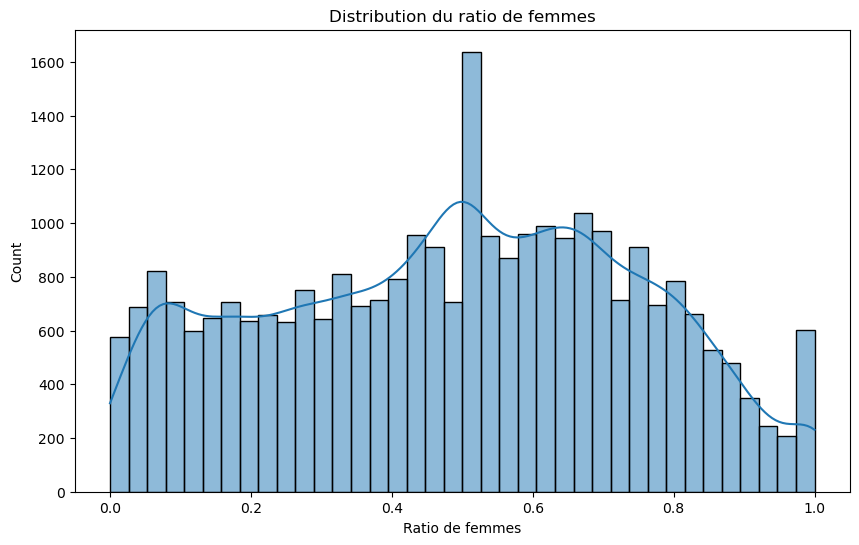

In [51]:
# Répartition par genre
df['ratio_femmes'] = df['femmes'] / df['effectif']
plt.figure(figsize=(10, 6))
sns.histplot(df['ratio_femmes'], kde=True)
plt.title("Distribution du ratio de femmes")
plt.xlabel("Ratio de femmes")
plt.show()

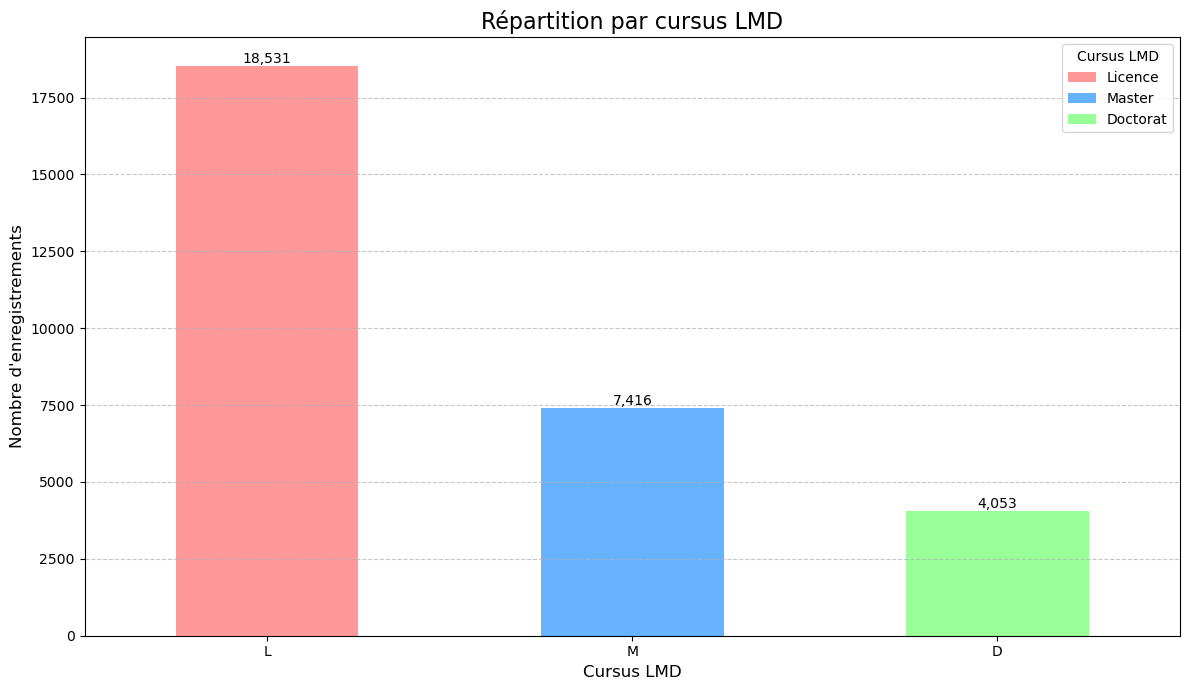

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# 5. Répartition par cursus LMD
plt.figure(figsize=(12, 7))

# Définir une palette de couleurs
colors = {'L': '#FF9999', 'M': '#66B2FF', 'D': '#99FF99'}

# Créer le graphique avec des couleurs différentes
cursus_counts = df['cursus_lmd'].value_counts()
cursus_counts.plot(kind='bar', color=[colors.get(x, '#CCCCCC') for x in cursus_counts.index])

plt.title("Répartition par cursus LMD", fontsize=16)
plt.xlabel("Cursus LMD", fontsize=12)
plt.ylabel("Nombre d'enregistrements", fontsize=12)

# Ajouter les valeurs sur chaque barre
for i, v in enumerate(cursus_counts):
    plt.text(i, v, f'{v:,}', ha='center', va='bottom', fontsize=10)

# Améliorer la lisibilité
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajouter une légende personnalisée
legend_elements = [plt.Rectangle((0,0),1,1, facecolor=colors['L'], edgecolor='none', label='Licence'),
                   plt.Rectangle((0,0),1,1, facecolor=colors['M'], edgecolor='none', label='Master'),
                   plt.Rectangle((0,0),1,1, facecolor=colors['D'], edgecolor='none', label='Doctorat')]
plt.legend(handles=legend_elements, title="Cursus LMD", loc='best')

plt.tight_layout()
plt.show()

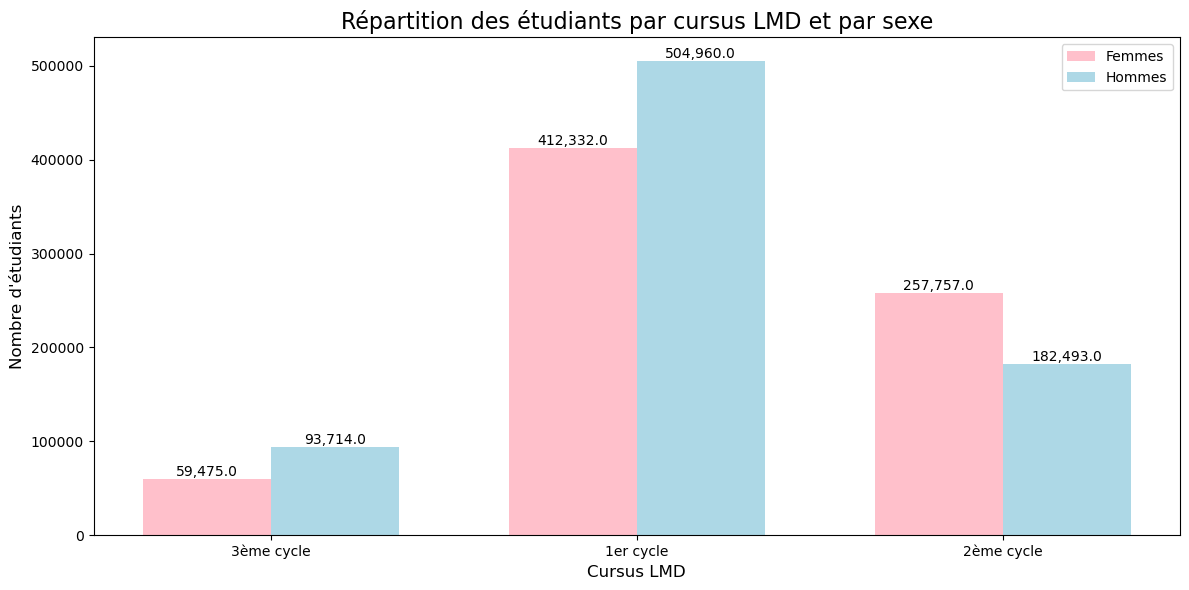

Pourcentage d'étudiants par cursus LMD et sexe :
3ème cycle:
  Femmes: 38.82%
  Hommes: 61.18%
1er cycle:
  Femmes: 44.95%
  Hommes: 55.05%
2ème cycle:
  Femmes: 58.55%
  Hommes: 41.45%


In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Supposons que df est votre DataFrame contenant les données

# Préparation des données
lmd_gender = df.groupby(['cursus_lmd', 'cursus_lmd_lib']).agg({
    'femmes': 'sum',
    'hommes': 'sum'
}).reset_index()

# Créer le graphique
fig, ax = plt.subplots(figsize=(12, 6))

# Définir la largeur des barres et les positions
bar_width = 0.35
r1 = range(len(lmd_gender))
r2 = [x + bar_width for x in r1]

# Créer les barres
plt.bar(r1, lmd_gender['femmes'], color='pink', width=bar_width, label='Femmes')
plt.bar(r2, lmd_gender['hommes'], color='lightblue', width=bar_width, label='Hommes')

# Personnaliser le graphique
plt.xlabel('Cursus LMD', fontsize=12)
plt.ylabel('Nombre d\'étudiants', fontsize=12)
plt.title('Répartition des étudiants par cursus LMD et par sexe', fontsize=16)
plt.xticks([r + bar_width/2 for r in range(len(lmd_gender))], lmd_gender['cursus_lmd_lib'])

# Ajouter les valeurs sur les barres
for i in range(len(lmd_gender)):
    plt.text(r1[i], lmd_gender['femmes'][i], f"{lmd_gender['femmes'][i]:,}", ha='center', va='bottom')
    plt.text(r2[i], lmd_gender['hommes'][i], f"{lmd_gender['hommes'][i]:,}", ha='center', va='bottom')

plt.legend()
plt.tight_layout()
plt.show()

# Afficher les pourcentages
total_students = lmd_gender['femmes'].sum() + lmd_gender['hommes'].sum()
print("Pourcentage d'étudiants par cursus LMD et sexe :")
for index, row in lmd_gender.iterrows():
    total = row['femmes'] + row['hommes']
    print(f"{row['cursus_lmd_lib']}:")
    print(f"  Femmes: {row['femmes']/total:.2%}")
    print(f"  Hommes: {row['hommes']/total:.2%}")

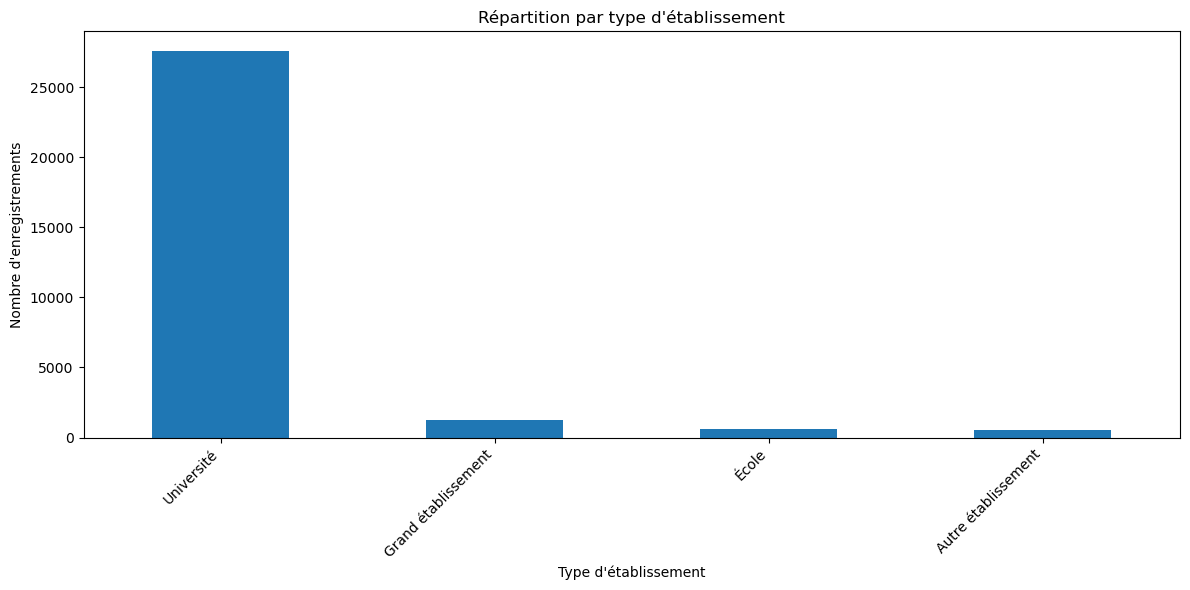

In [61]:
#  Répartition par type d'établissement
plt.figure(figsize=(12, 6))
df['etablissement_type'].value_counts().plot(kind='bar')
plt.title("Répartition par type d'établissement")
plt.xlabel("Type d'établissement")
plt.ylabel("Nombre d'enregistrements")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

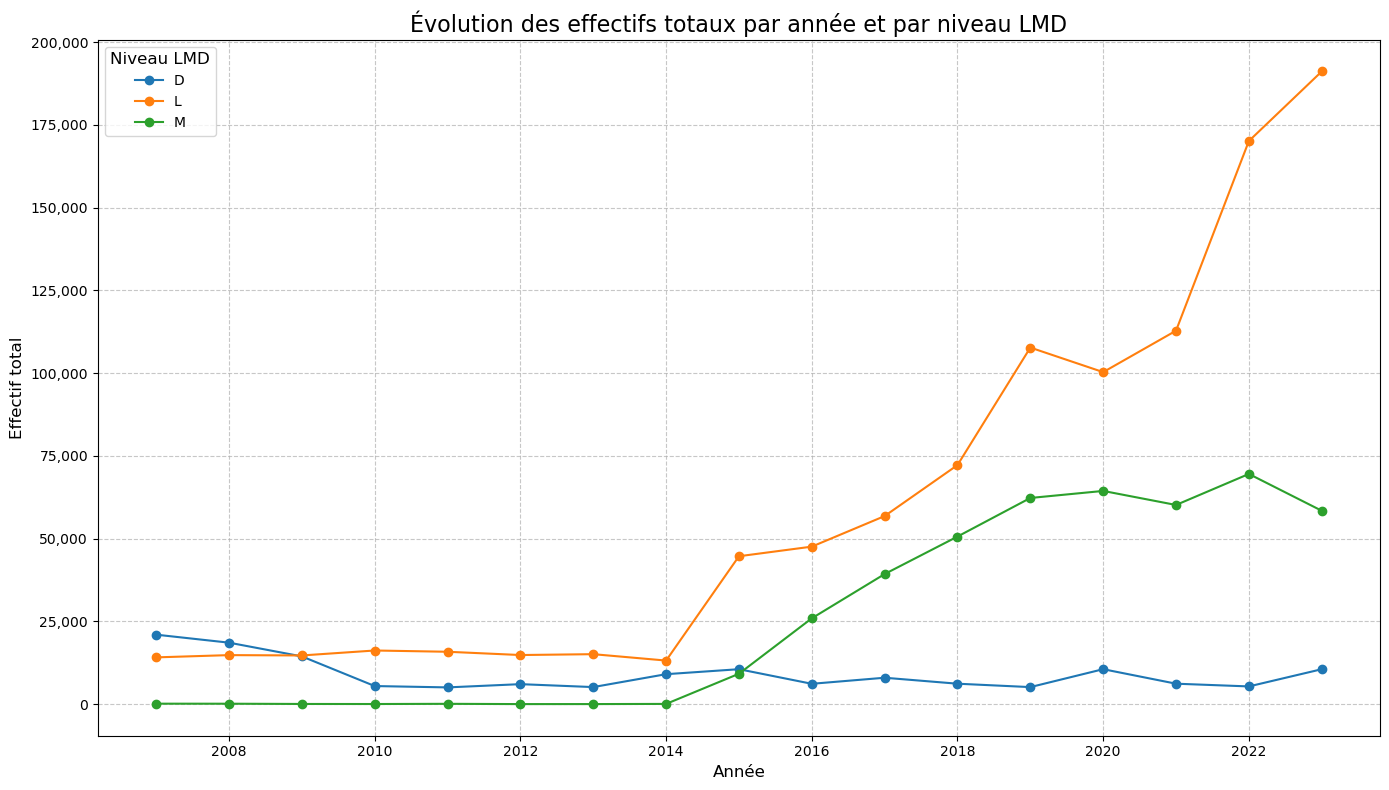

cursus_lmd      D       L      M
annee                           
2007        20976   14118    129
2008        18561   14799    117
2009        14409   14697     42
2010         5454   16194     24
2011         5046   15813     84
2012         6027   14826      3
2013         5142   15084      9
2014         9039   13152     57
2015        10545   44673   9168
2016         6135   47574  25920
2017         7965   56814  39291
2018         6162   72213  50616
2019         5136  107718  62277
2020        10548  100299  64404
2021         6165  112815  60162
2022         5340  170124  69534
2023        10539  191136  58416


In [92]:
import pandas as pd
import matplotlib.pyplot as plt

# Supposons que df est votre DataFrame

# Convertir l'année en numérique
df['annee'] = pd.to_numeric(df['annee'])

# Grouper les données par année et cursus LMD, et sommer les effectifs
effectifs_par_annee_lmd = df.groupby(['annee', 'cursus_lmd'])['effectif'].sum().unstack()

# Créer le graphique
plt.figure(figsize=(14, 8))

# Tracer une ligne pour chaque niveau LMD
for cursus in effectifs_par_annee_lmd.columns:
    effectifs_par_annee_lmd[cursus].plot(kind='line', marker='o', label=cursus)

plt.title("Évolution des effectifs totaux par année et par niveau LMD", fontsize=16)
plt.xlabel("Année", fontsize=12)
plt.ylabel("Effectif total", fontsize=12)
plt.legend(title="Niveau LMD", title_fontsize='12', fontsize='10')
plt.grid(True, linestyle='--', alpha=0.7)

# Formater l'axe y pour afficher les grands nombres lisiblement
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.tight_layout()
plt.show()

# Afficher les valeurs
print(effectifs_par_annee_lmd)

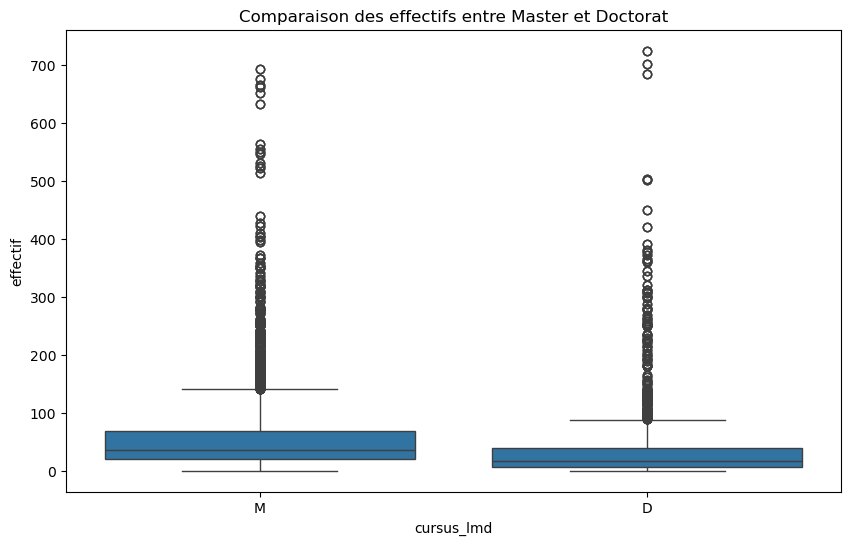

In [73]:
# Comparaison des effectifs entre master et doctorat
plt.figure(figsize=(10, 6))
sns.boxplot(x='cursus_lmd', y='effectif', data=df[df['cursus_lmd'].isin(['M', 'D'])])
plt.title("Comparaison des effectifs entre Master et Doctorat")
plt.show()